### Este notebook Genera una carpeta con todas las imágenes que tienen masas o calcificaciones.

In [19]:
import os
import shutil
import pandas as pd

# Rutas a las carpetas y archivos
csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_unique_mass_calcifications.csv'
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'
output_folder = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_con_masas_o_calcificaciones'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Cargar el CSV
filtered_df = pd.read_csv(csv_path)

# Función para obtener la ruta del archivo DICOM usando study_id y image_id
def get_dicom_path(study_id, image_id):
    study_path = os.path.join(dicom_root, study_id)
    dicom_path = os.path.join(study_path, image_id + '.dicom')  # Se agrega '.dicom' al image_id
    if os.path.exists(dicom_path):
        return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para image_id: {image_id} en study_id: {study_id}")

# Función para copiar las imágenes DICOM
def copy_dicom_images():
    image_count = 0  # Contador de imágenes copiadas
    for _, row in filtered_df.iterrows():
        study_id = row['study_id']  # Obtener el study_id de cada fila
        image_id = row['image_id']  # Obtener el image_id de cada fila
        try:
            dicom_path = get_dicom_path(study_id, image_id)
            # Copiar la imagen al nuevo directorio
            shutil.copy(dicom_path, output_folder)
            print(f"Imagen {image_id} copiada exitosamente.")
            image_count += 1  # Incrementar el contador de imágenes copiadas
        except FileNotFoundError as e:
            print(e)

    # Imprimir el número total de imágenes copiadas
    print(f"\nTotal de imágenes copiadas: {image_count}")

# Ejecutar la función para copiar las imágenes
copy_dicom_images()

print(f"\nImágenes copiadas a la carpeta: {output_folder}")


Imagen 001ade2a3cb53fd808bd2856a0df5413 copiada exitosamente.
Imagen 002074412a8fc178c271fb93b55c3e29 copiada exitosamente.
Imagen 002460132586dc0c7b88a59dce6e77bd copiada exitosamente.
Imagen 00857417d07096982013956033da1f75 copiada exitosamente.
Imagen 008c66563c73b2f5b8e42915b2cd6af5 copiada exitosamente.
Imagen 00be38a5c0566291168fe381ba0028e6 copiada exitosamente.
Imagen 00ec2be128f964da6f0b0ba179c4d138 copiada exitosamente.
Imagen 013e4b7bcdaf536c4e37b4125ab8148b copiada exitosamente.
Imagen 0171ab32059f4c226164a13c311f6824 copiada exitosamente.
Imagen 01958718afdf303581e758cdf34eaf8a copiada exitosamente.
Imagen 01df962b078e38500bf9dd9969a50083 copiada exitosamente.
Imagen 01fb871dc222684a9950609b62b76772 copiada exitosamente.
Imagen 02895cbbcb504f54c6882c4c5695f563 copiada exitosamente.
Imagen 02b3206d267eb7f354113b0c5365127b copiada exitosamente.
Imagen 02d253f51556e2e0af63525de2e9ff74 copiada exitosamente.
Imagen 031592807c30b54e2fb4bd2400e634e8 copiada exitosamente.
Imagen 0

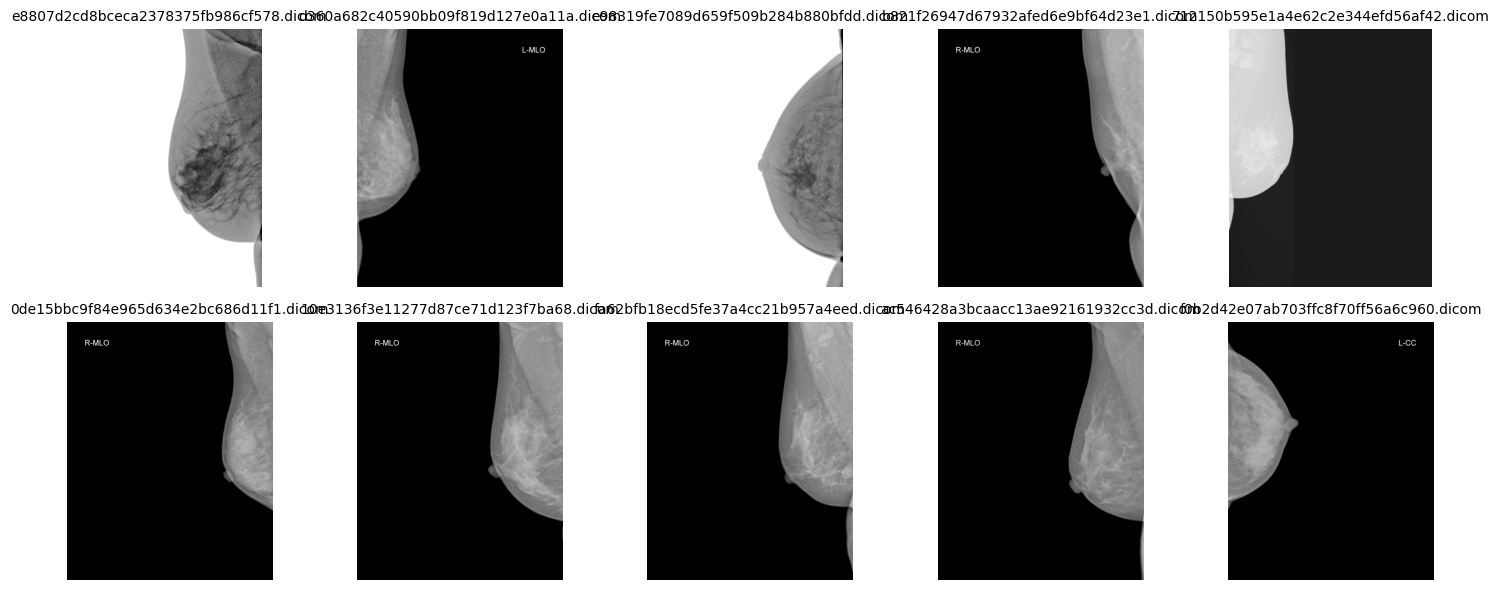

In [31]:
import os
import random
import pydicom
import matplotlib.pyplot as plt

# Ruta a la carpeta de imágenes DICOM
image_folder = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_con_masas_o_calcificaciones'

# Función para cargar y mostrar una imagen DICOM
def show_dicom_image(dicom_path, ax, title):
    dicom = pydicom.dcmread(dicom_path)
    image = dicom.pixel_array
    ax.imshow(image, cmap='gray')
    ax.set_title(title, fontsize=10)
    ax.axis('off')

# Función para seleccionar y visualizar 10 imágenes aleatorias
def show_random_images(image_folder, num_images=10):
    # Obtener la lista de archivos DICOM en la carpeta
    dicom_files = [f for f in os.listdir(image_folder) if f.endswith('.dicom')]
    
    # Asegurarse de que hay suficientes imágenes para seleccionar
    if len(dicom_files) < num_images:
        raise ValueError(f"No hay suficientes imágenes en la carpeta. Solo se encontraron {len(dicom_files)} imágenes.")
    
    # Seleccionar aleatoriamente 10 imágenes
    random_images = random.sample(dicom_files, num_images)
    
    # Crear una figura para visualizar las imágenes
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 filas, 5 columnas
    
    # Mostrar cada imagen en un subplot
    for i, ax in enumerate(axes.flat):
        dicom_path = os.path.join(image_folder, random_images[i])
        show_dicom_image(dicom_path, ax, random_images[i])

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Ejecutar la visualización de 10 imágenes aleatorias
show_random_images(image_folder, num_images=10)


In [32]:
### Generamos las imagenes pero cambiando monocrome de 2 a 1 para uniformidad 

In [38]:
import os
import pydicom
import shutil
import numpy as np
import pandas as pd

# Ruta a la carpeta de imágenes DICOM filtradas (donde están todas juntas)
source_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_con_masas_o_calcificaciones'

# Ruta a la carpeta destino para guardar las imágenes convertidas
output_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2'
os.makedirs(output_dir, exist_ok=True)

# Ruta al CSV filtrado (por si necesitamos información adicional)
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_unique_mass_calcifications.csv'
filtered_csv = pd.read_csv(filtered_csv_path)

# Función para obtener el `study_id` y `image_id` de una imagen DICOM desde el CSV
def get_study_image_ids(image_id):
    row = filtered_csv[filtered_csv['image_id'] == image_id]
    if len(row) == 0:
        raise ValueError(f"No se encontró el image_id {image_id} en el CSV.")
    return row['study_id'].values[0], row['image_id'].values[0]

# Función para convertir una imagen DICOM a MONOCHROME2 si está en MONOCHROME1
def convert_to_monochrome2_and_save(dicom, output_path):
    # Extraer la imagen DICOM
    img = dicom.pixel_array
    
    # Invertir la imagen para simular MONOCHROME2 (el valor original)
    img_inverted = np.max(img) - img

    # Actualizar el pixel array y Photometric Interpretation
    dicom.PixelData = img_inverted.tobytes()
    dicom.PhotometricInterpretation = 'MONOCHROME2'

    # Guardar el nuevo archivo DICOM
    dicom.save_as(output_path)
    print(f"Imagen convertida a MONOCHROME2 y guardada en: {output_path}")

# Función para procesar las imágenes de la carpeta
def process_images():
    # Recorrer todas las imágenes de la carpeta source_dir
    for image_file in os.listdir(source_dir):
        if image_file.endswith('.dicom'):
            image_id = os.path.splitext(image_file)[0]  # Remover extensión '.dicom'

            try:
                # Obtener el study_id e image_id desde el CSV
                study_id, image_id = get_study_image_ids(image_id)

                # Leer la imagen DICOM
                dicom_path = os.path.join(source_dir, image_file)
                dicom = pydicom.dcmread(dicom_path)

                # Crear la subcarpeta en el directorio destino
                study_output_dir = os.path.join(output_dir, study_id)
                os.makedirs(study_output_dir, exist_ok=True)

                # Ruta de destino para guardar la imagen procesada
                output_dicom_path = os.path.join(study_output_dir, image_file)

                # Si la imagen está en MONOCHROME1, convertirla a MONOCHROME2 y guardarla
                if dicom.PhotometricInterpretation == 'MONOCHROME1':
                    convert_to_monochrome2_and_save(dicom, output_dicom_path)
                else:
                    # Si ya está en MONOCHROME2, copiar la imagen directamente
                    shutil.copy2(dicom_path, output_dicom_path)
                    print(f"Imagen {image_file} ya está en MONOCHROME2, copiada directamente.")

            except ValueError as e:
                print(e)

    # Contar y mostrar cuántas imágenes se copiaron
    total_images = sum([len(files) for r, d, files in os.walk(output_dir)])
    print(f"Total de imágenes en la carpeta 'imagenes_m2': {total_images}")

# Ejecutar el procesamiento de imágenes
process_images()


Imagen 81bf78c982ca444852fa95af7d96429c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9eac03525ce74859de0f3643d611ef78.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 255f0dcc5ca3131051e5fc06af99fca9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2424a42cd4c30fdb50d63a044055b1ee.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4785b56fa6a49b939087d0544a04e65f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ab972de519306ea9c1ce7629e8145cdf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2167f4da549862d60f43782cd38fb8ae.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 002074412a8fc178c271fb93b55c3e29.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 807c754bdbee40c54b7f4452b6410bb5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a743c234e305205215516a957dc669cf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 509310f050909df752c2f63c4ab4f750.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a0e6576e376ac1c8a484e2f15daabb87'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '0fb063fe3b46db2bbe83d124a3793101'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b96bf19eae6ad53b79889034d67a0011/a0e6576e376ac1c8a484e2f15daabb87.dicom
Imagen d3d33daefeaa80d3a4fc73900775a040.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5765fc3b2a44f33c127621b8f744425e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bb307884bfe5da3db54b94b736f10023/0fb063fe3b46db2bbe83d124a3793101.dicom
Imagen f56a57a109aed21840b83c8453e06a6e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8aaea8ad26744fa23f786699ae38d66e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 194b24263d11adc0128da9953588359c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 76b909c5601fe92762a1d85395a9c54b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ba2c3703a000ce6807432b4e42e50b3b.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b68769ba266c8a6ccfc95b649e14e23c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6ec73d7e74c73265c4f9ed781ccecd71'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen d3bc4b6710f1bf8a4bfd5482feafb595.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1f741efcce7da5f4fcc10378eeeab159.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/2d2bb6d7e02db98049f2f598bb8c889c/e07cf8ec5f1048ca51adfedb641aae47.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/12c181a0785ed3b2c2b5f7cfc9f2667d/298aba8110e3e2667be23e7f8d188f44.dicom
Imagen 9ed0db9a85b0a25cf259b1b88518e9ac.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'e07cf8ec5f1048ca51adfedb641aae47'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '298aba8110e3e2667be23e7f8d188f44'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 333c3fdb0ea842b3c4e4d799b5ea44e5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2efae215d67dd0ac64bc98a92e4be461.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0bb148da1406b21011529bb886c17e79.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2bc1c6df1d38102593cdbc50610d2010.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0aa8394efecbfb0f5c4a66ffbd215912.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8f7a74bfa165aab965cf57eb16bbae42.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a37e508fc994c1c7a846ec23edfb400f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 38fc7380e0a6758867c3156d6665d046.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f9a54449757586583a8f36ccc821f7ac.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cbc70879a8dee060ae3c802b32726ef2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ca29f9b290c2613c2d0ae9ccfc8fe722.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f78853b3aa2445fb60d677f6f5d82ca7'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a4eed594bef1cd59ed0b567f7a1cd7f6'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 8ce22cd4d6868becbe875f74d83acd23.dicom ya está en MONOCHROME2, copiada directamente.
Imagen de8b49dee1cd6c3a7dfd404a1de4d266.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0bcbcbbe010d72178ba66ded4ad519c4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e9781ad8ecb19a1e66bb4d678c767759/15fc491b06ef82774b6b8fc6ab09ef23.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/0fab8097f55f21d4bfa7667250122312/43a32df43087ababd713b27ab53f2632.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '15fc491b06ef82774b6b8fc6ab09ef23'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '43a32df43087ababd713b27ab53f2632'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '467ec6ad950bb90b6f797d52ac3ab843'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 1a52264b19da38964392d40a72362fdd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/0f1a7b0d4efecb388a4b98ae5e2d5c29/467ec6ad950bb90b6f797d52ac3ab843.dicom
Imagen 293f56aa2f38c52c70ed4a92e2f01b46.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 070170f7ee43d9304852fafdde498b05.dicom ya está en MONOCHROME2, copiada directamente.
Imagen de1fa3a78d7ff2d5e52dac51162af5ed.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 17127fbc6f1c700106b7ec6725012007.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b68bf8e5a0640f159ad977f0e64aac69.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6b1dd04208019290c84add37e109fa79.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 35529cbc5b22c72b5da91ca7dd44a834.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ecc7ed202ac2b9a6dbedcf323e9c5673.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2b5cec9cad04a6c5eaf1cd2ec2e7a6f2'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 0b39adfdce0aafaa1ff02e9633e9cac5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0a6f0eac805822cd00f3c25ba99569e8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 02b3206d267eb7f354113b0c5365127b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 63857e01d707240c042dd951cffb43de.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 248979f8c341862b99d2ab1e40a4efb1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dc4694b543793f89c7003f4d52adbbcb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/0f73f59df0d9355ebe1d6024753a9e1b/18b6303a3ede8d3556f87dada8d64c49.dicom
Imagen cac4e653b793ea51e867f74bc056833f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e5fb50fe073153c6006638c2cd264363.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 23edfe4412bf14c73110dec6fdd9e66b.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '18b6303a3ede8d3556f87dada8d64c49'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f3dee44f17d451479bf163107dbb9cf4'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/840089a7333e2984f54f4dd213500f16/f3dee44f17d451479bf163107dbb9cf4.dicom
Imagen 4494c6e2c08435784d5b1f25ac7b5869.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 26cc531e126e10d88eec413dcf0a4963.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/65b8c8d3af382a51b3c8465be1f6f06e/1e7ad5577c2f5e49294f9c3660968910.dicom
Imagen d75092349d2b99d2cc62f5f5a61cd164.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '1e7ad5577c2f5e49294f9c3660968910'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '53f6139f06e3efdb61d1ec6e1f1e6982'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/2486fafb68786b7f8ed662783ee25a49/53f6139f06e3efdb61d1ec6e1f1e6982.dicom
Imagen 283a13f9619b6177a7c389ca6685d715.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 99b304a3e368041ed3674dd654c6cf8c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3067b317b88697b45e336a9e1a481021.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 87f492b1ef0b4090691311a40b81da6f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3d89638d839e41c1b51939a11fc3af42.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 52915cc92f5632d0a5da6dfd60a0d31e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/2035c27f797e5b80a104640985636167/851af5bfe4d9b12c605998e1fe7355c3.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '851af5bfe4d9b12c605998e1fe7355c3'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 531bba59b58ee255662e46898934195e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 64e99947cfb282b5c17e447510317465.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 042733688eecb852ea06140448a8b1bf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3920b4311fa5b13f5a2c9185156ae9d5.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'da685aaff3936690ba8b2a3ad1029616'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/26571f2d2c8cc89e30059d05b4cabb1a/da685aaff3936690ba8b2a3ad1029616.dicom
Imagen ffe25766ac37ab145ae7f0bd78665f81.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3bb3b2b2842c76b37df73a4efcea25ba.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1e074d67076ab3ccbcb6fabb7a93e479.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f1dd8037a1a5f684cebc10a22e2e2797.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 76a00a3b38f9db17333f89eb66db5ea6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 63fc9a74c6faa9ea7a869fe657201e70.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4f0b75a4d53ebd31eb54d68f03eb44a2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 52750d0cf16931d9f09530901041a345.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fb16653152c4808c9e759888d15e42c4.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '4b08c4f184eb69a3c732c8e8eb627af8'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 726e579eb8982c5fb3c120039a64fe01.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ce4cbd6f019b513850603189efd8431c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5fd515ea4eaec3493943c4eef796b41e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d838dc1fa3b1c99fad6af99fef9f2b77.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/eb00456647df18bef39de8faa2fbbdb1/6d4b6ffcd0093b59556f16d3c4ab1bd9.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/29e6666c5ca74d79a315d3f0c35b3013/2f9ab025b47b8ea002694ae047aa5cc2.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6d4b6ffcd0093b59556f16d3c4ab1bd9'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2f9ab025b47b8ea002694ae047aa5cc2'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen f50d531553d2958b575c4f5bb7141b17.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fd0c0b70adb9608b5b2dcf57f05668f3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 57b04a1958443efd27484f9e2d0b7615.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0d58856b402c571d3fa0fc19d26267ca.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dc934bafd05c7487d5908800f75a6149.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1c1b9f28c515819a9eb5191e36709d8f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5fdf0b41752d8b15dfd523053858da2e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3d086d99dfafbb52a8785c25426a82d5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b5afd0e7eda07b33e4ae37f1a8251c06.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a6dad62e2c8528abf3e74324325cc6d3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b119e0c84e1e3d4a66072329abd56857.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '16772df2fc68173354ed7b5684e40a56'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '69b872a225cb0e218a26a8a313ee3ef4'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen eef5cd5a78bcf8da9057f8cababd9ae2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4ccf62726edc8b13770d311b9929f8e0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bd8c59601a3dfcde6c31d32aef7e8c93.dicom ya está en MONOCHROME2, copiada directamente.
Imagen de6622b3d5c5d01f65e594607562a975.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/2035c27f797e5b80a104640985636167/b4b83d6c6e16b93b623b9ac0943a665c.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b4b83d6c6e16b93b623b9ac0943a665c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a5679dc25691dc85f0639be26b421195'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 271e8bfd46adee65f8580092753d08e5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 41b26fbba63c7cb1ffd46446fb7dff96.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c44df7fef5f059bbc5cd6afeef0f5653/a5679dc25691dc85f0639be26b421195.dicom
Imagen 2bb31d34320c4d1005371802dcac319c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 984d290c15646f9113498a06d0a87b3c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0e9481c18a33d55b1fa0a353f53e0d6a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e79f419d756e9902fc6ff80ca0d7f7a3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ac546428a3bcaacc13ae92161932cc3d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7f1638ea57dd009b6a86d47f7a369fa2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '48d67e59b596a5d42b2ca037839979e1'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 6057b80f4f3e7d18f2bac341f7a64e07.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2a67cf5f900de22b0c45fb2c1d55dba4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a129ca2e83de818bb229abd42e8533b2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7106e773a592248be9617d781c4887b5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c8673267271111cc481f2793d94eb565.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1ffb933b38767a155e5afc94d852bd5b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e1314fcdd554aa328145271d19db6929/86176a5feecb57e582b70cfb87699929.dicom
Imagen 3b95bda18918892c9a44422bd01b9ffa.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bac0233f881d0c619ee06c6ea6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'af34fd8e49975ab42bd8343e4f5eb821'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '264233e448f4ac70a925dca6d1bfb64e'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '67f49885895019878c47b21422cec4c9'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/840089a7333e2984f54f4dd213500f16/67f49885895019878c47b21422cec4c9.dicom
Imagen c8f6d4876fa771042d6ad4be5197f01e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b84c938e5d6e25da98625dbba840b521.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 54b2fd916363b3e07667e3f1d65f085f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4387b27413006bf656d90e6ac07236a1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a9c839293c5d12e8ccccd20281ffb692.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/91489fc5a74d1452737d06d7113837f4/a726e03b371093bf18cf884c39dad799.dicom
Imagen 1a6fc2d6c56e6b1b45d348df8c63c511.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c6d548ad2a3585ab49bcbb43f2ca9233.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a726e03b371093bf18cf884c39dad799'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 11dbf2405e94335db8d8011db532a5ac.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ec84e73ed122ba2efdd4548d471d371e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ceba5bc55af884639239e562ece20aba.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d3608e08c17fa916dcde1203ed5faf61.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ebe0d766cf25c8576d78d0e7a351e39a.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'eecfb481b3da4f3b400e8093eeda7309'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '3631f3970d8dd637e1cf582f2060fdce'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c8b870890630948cc15263e0c38c7f05/eecfb481b3da4f3b400e8093eeda7309.dicom
Imagen 9f5fa78866f78f172de2418ecfc07b9c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ed7f08bd090ef198bd907807d1808961.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/33b8f87d3dde7de79f1d6253d33bb235/3631f3970d8dd637e1cf582f2060fdce.dicom
Imagen 56030132cd20bbf82075392b8dca6405.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9f63e7d767a3361df11d8aaec234aaef.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/8b202f831f93639ebcb9cccccec03b09/001ade2a3cb53fd808bd2856a0df5413.dicom
Imagen 11d1c20d269f487d47fa5f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '001ade2a3cb53fd808bd2856a0df5413'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '48d0e802edd6506cf5549db3f09b3c4a'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen b821f26947d67932afed6e9bf64d23e1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 683abf5002cb766e0d5430fbb25c2b1e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a09e8001e6b29128dcae4cc0d1b02cca.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 98eb0445d9d24e3eaddd9e244441ca1d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c413c9130c387f479a3f257f9469c5f3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 54aa2758fbda627d811412679d95fb22.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9b274ce986284ade0c38bdce2eae1275.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 75dca2f372e9a594e1798edd09c44bf9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 625aa350502a7038cfe5f9ca5f1a65f4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 525a35260f5484d6d3bcb897fbf16364.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ae75f02b14b5582997856eacaf8aa995.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'ac315834dc489efe6d1e96d93ae8369d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/ae4b6f49514c32216a8aabb4b3ad026a/ac315834dc489efe6d1e96d93ae8369d.dicom
Imagen 37a23b32dea999c01e4bc46901b21d67.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4da72fbf2d9cb39fbc09b5d369a3a078.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b7fc54391dddda25d09ba4427e394ce7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8f4ef2e7f055570b445c64a5ad23b0bd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b3faf86a872751ca591a20a46c68b7dc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7009b2522f79bc2dd81f2a311bce7914.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 792ab47acb4f894e9607a4ac17cbc140.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 408e8d491fcc74612a291e9579d9bbad.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9c17baacaeb80482b4ce778e64b792f5.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd7815929d503a461d7f7e25a7a18bd86'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 2671a2eff9d050a10d8bebe42e4c9cb9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 153e6a233a6694e96db4356a947c9678.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 52b403c5c51efa04629aebd1629bd1a5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a158fce586b2eccc72b08fb5c3010b86.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e21672283ffef748a7ac7bf68ba9250e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a7de2c103d8abf7da6963cf18820ed81.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9ccbcb1dc6337f6177f70f03f6815c78.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e82b6324ff951df4158627cf430996b7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/92d7a655fa2168f2b91dd9f614865d1d/86d6bf4089c8c873badf6323750c7028.dicom
Imagen 4430c6ead70e7557344abb5c23ec0781.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '86d6bf4089c8c873badf6323750c7028'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'e2dfa8e5c2b50091ffbdb20dff13cd01'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 41040a367358df02680bc6ce2ab7475b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/112accee625e15fe60e48dd52afdbbcb/e2dfa8e5c2b50091ffbdb20dff13cd01.dicom
Imagen 35721bd45c2cc3619bc9472b81ec871b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dee30355cc67413cbe4c12770a0d088f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ca13a4909b0a95d4ba8a2030156f726d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cea7726bbc92b5e3b5ca8c2c65d3cafe.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 230d88855d53b8edfb4c3cc7ef1248db.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fa0104443e2e60effcb1e0222a9b015d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1e2d94424f5a9a847f1a7e8eae1ecdd7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d83b16559c3ad828bd86db23e4f11243.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '57b34fd0da5ef7b8e9afc6b269ccf717'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd2c75e02ba8114f75e83dd1b3ab73cd2'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d7169c8f349e5c37fc0cf2ce78cdd4cb/57b34fd0da5ef7b8e9afc6b269ccf717.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e11cb06c657324160b15e72be89f6c28/d2c75e02ba8114f75e83dd1b3ab73cd2.dicom
Imagen af57a0fab5ac65a0649e1c704dd9ff77.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a3415116030171359f15e0c14f9e75b1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 619c3641bad6cc105b32173c3e0747cb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 19c0ecd06984b4d4b2c46812e85a06e6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3003a43c012e3e7c754151b4b578f90b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bc58e54ec75acfc3acfb248f409ff2f4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 09e75ac07373f2e576fdcd909993b3bd.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '0e31855d02eadf8670ffaeeaeddbf229'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd91825b15e444b4cab3a50b8927a7b6a'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'bed07d0a971ee8225e982dcfc16e58e4'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Py

Imagen a0694adf9540b4f755dfdbcf3b1eb725.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b9f3c7402b190c39344e31c20797851c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 35783ec8085d79bee19d78f7295ba6c7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cc73fb4a62928a28d8cb94bbbb5b68b0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 85a6579cbdc403cfc4dde0a8149ed855.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0d6987fc066d2fad238b5c15f4e9bf8e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 689d1143a98c1fe8d350b31390df9f44.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 061bc49a16cad3bc2b479993f7e689f8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bb36a71e3c2978d0b36fe9b6a8282e1b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen aedd473a95d8a4b1cb1280c0ae3d5eac.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cc68ea142fc1f2a4a4fb0d436b900d32.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f7cdf7b22955e66d34cc1efccdab5fbf'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 6db25afb04a1b448503aa037a4b955f4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a9f3f9e0195685ef7e02ecb2f90df158.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 396bea28fd4be11598bc53bf5f2b7460.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/6d75446a6406fc669f3464543b8f7893/1a89e1a41d82efe8826ffe15c41db3f4.dicom
Imagen 2b217e87073f6ea171ab6d5e2034aae3.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '1a89e1a41d82efe8826ffe15c41db3f4'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen c543a2cdd156d18be46dfa4c9d42cf5d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4a29dbe9d326db4d304b619ac9b8d10d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d51acb58b7bbec42dc749b5463863c6f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 064f024583e9c1a7f0152f50aac1d16d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/dc8eca8e41cb72804147da33e91917bb/264d5e05c5774d9770eaf74c0483bd50.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '264d5e05c5774d9770eaf74c0483bd50'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen ff1006f34fb13f42dff90aff81dc33ce.dicom ya está en MONOCHROME2, copiada directamente.
Imagen da30be3e50b5820186b55d2533ca46fb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8fb613d708077bd1d64b7e4302b6e920.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bed3876095746621094457c257b0f7f1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a89afd636c07ebb8d327d495ee3209db.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d16e0674bc7cf9332590075d9aa2553a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1d6b62c0ca67fccea012daed532bb9fc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/0b86a34d84ac7587f7374589268debf3/b7ba81b370fea9ed54efd7b07e813548.dicom
Imagen 823c857f0165eea50b05b9c46e1780d8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 86048af83b217cbc59cfa9d51af09696.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b7ba81b370fea9ed54efd7b07e813548'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6f6c283d16eef33b314e99fcedad3831'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 4838c9ff9e5a1c0fcfbce86d1dd85384.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e668b1bed3d1501af1c88ef1ecd85a8c/6f6c283d16eef33b314e99fcedad3831.dicom
Imagen 9330f08b02db571dcfd55ddffeb66189.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ce00a3d09a67659c9ca5a3f6e7e3532f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1f4905d08a4a71d7791c775fcde2014b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen aff405327ebfea400a1ac96c37a7a698.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dcace605b9887715f335cc0bb41a2841.dicom ya está en MONOCHROME2, copiada directamente.
Imagen af0c0fea36bbb9bf3252321cca4e275c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/615242ea26bb1db9db5d74acd0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '80782a78ce39bae561649b1d95df085b'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 5e4e0eb37056fddb893c7a5c6ac33a5b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a2ce545b7d7d400e6599dcba1fb0b5b6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 75f0f091a9dc057a428db5761eff3475.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1cfb1d7f513466d8ca7900c23346d309.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/a8cb9adadef00fc473b1760cd7b513e4/49cf189f3a033a24396459793ad27017.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/15a411e94e743361a5725ccf6b728ded/e8807d2cd8bceca2378375fb986cf578.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '49cf189f3a033a24396459793ad27017'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'e8807d2cd8bceca2378375fb986cf578'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 841802bee1fc1a6b4bde97a754713da8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5353337c9c256dfa34fa5c4b7aac27a6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2ca0998e6341d541e8df5927807f51bc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 39db902f8a8c3bba8778f74e5e2b9d76.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bb307884bfe5da3db54b94b736f10023/f8b75219cf050a795846c2772fad3e94.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f8b75219cf050a795846c2772fad3e94'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b04c7c85b42e5886fb1ddf86273f80b7'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 7383cbe8290fe3623721f13673016137.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 922a9c30e31806274c342ef5ce566be8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4285bb1fd50ed9f19bd507e66738189c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b92866ae274bf695b28b2ae27e8bc1b4/b04c7c85b42e5886fb1ddf86273f80b7.dicom
Imagen 6fce44a9101a0851e8057e2d36339c17.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 729fae337639d825ca83e563c6efedc6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9be8f8e91569f85bf8472c9eacc47753.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a0645ef8030c568f36e4a0430299de5b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bb771ab48723c9d1e2a87e8bb19d8dd0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 551162489fd5e6b59336fc1eee7b7021.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'e98319fe7089d659f509b284b880bfdd'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen ec9477ee8b60f14857c324dd63b71b87.dicom ya está en MONOCHROME2, copiada directamente.
Imagen af9ae4f3a9ca14aa12966567ee6c5ba7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e153f0c95056a74dfe8bc5c5260ee939.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c8b870890630948cc15263e0c38c7f05/eefd7f23922a576ee1fafc96e5815ecd.dicom
Imagen 3944b33b99c98e763763b9da54b4f41c.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'eefd7f23922a576ee1fafc96e5815ecd'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 7de4fa3d36048e2bbdaf181155d728c2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4e18bc58696aa628e02c43be53b73cda.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 895919f94d2054826bc04c14f45f080c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6b180003def75a5e79fb66a9c789d069.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a0cdb392b0d791725f8aea7f3f7f2c22.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b50b5943e02004c10ac6de73d93cbe50.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 50c59bcafdae0aca9af54cb36bc43e32.dicom ya está en MONOCHROME2, copiada directamente.
Imagen af5c3f9e3b64ead393c4b160eb3349f8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d746c5e878799ec8f42e2e8f6ab9a992/01df962b078e38500bf9dd9969a50083.dicom
Imagen 2feab51140b38f9ec90e17b7006501b2.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '01df962b078e38500bf9dd9969a50083'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen b458f37ae9b350ebc733d249db75401e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5173f7390a4426b1d2ff13dc1db4111a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b6db414be07dc1fb3cbf82a9e3a4966a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9076323f4b661b4b57a9229b869c62c7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b25780262123eea6faf63a3aa741d228.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 94ded0fb1036a6f4f044beba047b8d3a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d924e9f6422c24d39309a3e46f379219.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0c48ef2d25c7fe685e4a9d20b676c3a7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/6c1e2ba57dbae930626624bf0e3a7357/f6b19e19ebc1302afc17c9a3140a4ae9.dicom
Imagen 93ed0aed7d5768f948fcc46861b4123e.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f6b19e19ebc1302afc17c9a3140a4ae9'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 6f8e34d9a3a750468528290d5813eb1a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 519e1a01bd3c08ad8a46fc476730ca0c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5420f34131041364bf3d65b35bb86175.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 20e22b55458ddc1002871f0b10bc0c91.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a93f1732181e8dc316aaa1dcb2625d37.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4459e5a3c47ab8d6e79d80cf198d60f2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen affdc5439f3771b95b57873ce1c31293.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/792610d6c4044d3a4e2cfdbc5b494768/5cb3de6d9a5c63eeb83d660420c9044c.dicom
Imagen caaea8270feed9e68f0e972073b78fbe.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e87781720c2771e22823701fcc0aaf44.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '5cb3de6d9a5c63eeb83d660420c9044c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd987933458341d14ae716476acb53bc1'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 9ccbdc3148ab9ef203d25d26053cabf1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e9781ad8ecb19a1e66bb4d678c767759/d987933458341d14ae716476acb53bc1.dicom
Imagen ea48fbfce53b34c264ea92a318ba748f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen aa02e8c5422114d20da11c573d0ee8ee.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/de627023c9a8f2ca7b998d4f1380fad1/0f714f0b91dcd0ff05a60290440d1004.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '0f714f0b91dcd0ff05a60290440d1004'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'bcb1ae36b77c5324ff9243999acc20c2'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen da211004c86dc257a947ae9736639276.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 00be38a5c0566291168fe381ba0028e6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/da17728ab905a565051f16986aafda50/bcb1ae36b77c5324ff9243999acc20c2.dicom
Imagen 76ba1ecb6e84a2bcb9cad67dbd21f9e4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 17d2f5831c5cecb238f512e28f0277d7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2530e73814b6a250140fab195ac789cc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e6d36785309f9f0e21046406b937c374.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 767f72e2635ddf53b940ade1732aba03.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6ae164c6988c764284755b5d3dfce5ed.dicom ya está en MONOCHROME2, copiada directamente.
Imagen aa5a2d0995c8ade68690438531dfd770.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a946022ece3bfd27edd0c9ec512caff8'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen bccead060b49d9a6034fb98165cf925c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a3e787ded9ca91b8281beba75f6ed60a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 232f33051c77bd6ce2d185aafe9471a3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 06691f5dc2caa5f72c05d4b26af810cf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 461d48a657a9bfe7b6f7633a95865a90.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4222799fe0cfa6c38deebb89967baec9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e793562ebc24362abe53753378f9cf28.dicom ya está en MONOCHROME2, copiada directamente.
Imagen be78f120687426784bc691d838802a07.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e7ed852e596846ff61f0cea69d9f2ae6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9e25ba10f5cb25613d5181240272c1b5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f1f79501410a98782c0a03b48e66df83.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b170cb834c8bccc382bc8a1b667e6100'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c659e0e01ed8e0ba6dc0adf5418eeaa9/b170cb834c8bccc382bc8a1b667e6100.dicom
Imagen 4c30f4f248be62ba9497754adeca5acd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a8e66fc1ad8e78cb6ab460d32bc7b299.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 150cb5d7fd49a32058caaa51714e8cd0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 852606405afae7cbd11c46598bc9b3ef.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3b824a3886501b395e22d78f817b4b13.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c115b4d359e1163d6a143455a5139201.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c1bbd7498883deb078c151ee8ef2e3e2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 91c595ab22a73f5a0ae616cdf9e0d1c2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8fcd78aec5f1cbbc380dd84ea71822f8.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '54716121c39ea4f99484a063f81a719e'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'ad1966572be8828018237cd3ff44ae65'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/a4d12ca2beaf6714f136cdb1370b84fc/54716121c39ea4f99484a063f81a719e.dicom
Imagen 949f01bd6f057e07fe96ca9021dbab48.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6ffc6c2d163e10db5e43dd845638f6e7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/615242ea26bb1db9db5d74acd048d3cd/ad1966572be8828018237cd3ff44ae65.dicom
Imagen c914b7cf565f42dcff179e67b238d62e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9ff6c2a3ec1f88171fc05749f7c174ec.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 169b1fe3b0a21d269af8971754e3fa7d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bf90ae111

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '611b1780b56340f0d3072c2a09967088'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '40ed09234040d4f119a5f24bd19c9e93'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 4a97666bfc0fcacbe5509c2bfd9368e9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c90b41cd28971bc7047c8b8637718a6e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 84f451b4a008e729604feb03179090e6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/cf70a8015962943d8637b8b5db34ff25/da860c7c1030662471437b1c9d32ed81.dicom
Imagen 9b86016c01b2566e91962ed6bf78339d.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'da860c7c1030662471437b1c9d32ed81'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 7385e8cf7b29764525c81de4aa1aebe4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 547ad63495fe93f02cc49c9d7590794c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fbe89362c0679ef85b12823a1a3fd3de.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0b597a53d015b5d2c2df81f4c19eeea0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6770e08049264165b58c5f5ddcfd5b95.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 031592807c30b54e2fb4bd2400e634e8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 223646dfc19e2605828b0262bc68a4db.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 21a78229489f5b35b0b037f678a5cac4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f9918b3feb92e1f38a0c86a6a28c14a0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c6748f2e0790cca1d48a24a989c6e1c6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 27d9bf4e5b772624325d6232ffc8378a.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'ed15e2630a1d858c0e0fa9aa2348eceb'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c44df7fef5f059bbc5cd6afeef0f5653/ed15e2630a1d858c0e0fa9aa2348eceb.dicom
Imagen 313c8967c8e806bb1bbc738f1469d133.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 050c2f6caf47f439d62e1fc8942396f6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6ffb4582bf7434518000863d13bf8915.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ad362576326ffb1cd0bcebf515a2b7c5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7007ced529a36ac4b7639b8ab15f3ce0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/a4d12ca2beaf6714f136cdb1370b84fc/9a88a3e60fb94b5bc30dbde599d7c14f.dicom
Imagen df07d6393573cbd0969186a76343702e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f60e4a6ab3f58f13e178fe8d98e532c5.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '9a88a3e60fb94b5bc30dbde599d7c14f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 431964722939d4720140fc70e2da76f3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 94e81289c5b5678e4b6e4017e1296121.dicom ya está en MONOCHROME2, copiada directamente.
Imagen df1a94aad76bd2e7beadcf00dfc715bb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b8bbbfe3016169f2182794ccbea6bcdf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/1e2b0ce2c5a93c643834c98803e6ac2d/f2ebfa37e63f0aa3306b4cfdd4c7a18c.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f2ebfa37e63f0aa3306b4cfdd4c7a18c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f54b07517cb46e8a59c1c10748bdb5ed'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen ae5627834118974e626219897bba18a4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 605751243908d029dd0cbe46c0b8809d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e11cb06c657324160b15e72be89f6c28/f54b07517cb46e8a59c1c10748bdb5ed.dicom
Imagen 61dea424b31908763e86ddb3e420e007.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0dbc1663eceef924f0f339604af18364.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6943cda7ce5b1cdf56ea8fffb17c52f5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 78451d4b68941dc6805bb6ed08f86412.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9fc52c130cd84983d19524a6ab941c34.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c9696e555b3ec7171832629cfa8fb6c3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 66d392ec44df82ac333d01411a01679d.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b021bb379f747c45e88e5285b97f0ab1'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd25ea7dce5e60b1e054044acb722096c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 2bc80ebd58505c88bf1fc81b72c4fa42.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/70f98f73ca0714118b87a3258147101c/d25ea7dce5e60b1e054044acb722096c.dicom
Imagen c1b626dbe028a9872412d7646892e446.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5fc451ccea65adb2ba624fe0d3c456f1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6cab0db67458b7c2bf4afade630adee5.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6266ffa44d75d2edc9d3c725b20b6d49'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '22fba1258f27256a9f1d090b0ddca9c7'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d9f85d334141f3554fb6faceccdff570/6266ffa44d75d2edc9d3c725b20b6d49.dicom
Imagen 1407cdbe965eb744aa05018b37923ba3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/1e2b0ce2c5a93c643834c98803e6ac2d/22fba1258f27256a9f1d090b0ddca9c7.dicom
Imagen a42275264e5c92ac2f49e6a858f9a6ee.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c440e178bb3f7874aa1d6a4b10e66105.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0abdf3f3255cb44a2a15908a811fe6e3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 557a2c3c6d82872584e701efecda7d0f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4b9618d7a794a67ec6b53a187254b700.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a5e6d2685d98df07408babfa56261665.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '891295e2c553da37d37c76b463f1231c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '06a407691cadae64cea5de8e8634a4ac'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/dc8eca8e41cb72804147da33e91917bb/06a407691cadae64cea5de8e8634a4ac.dicom
Imagen 6d9dc7a5dd8bdbe82eceb4424ca04cf5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 66d5d94402456f664753ec443d077bf9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4b2f606afd7ed6115e03f2ecc270c0bd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b1c20a2818e9a9699fb1924b9c6322bf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4672c439719dbb46a78d19912f0473ac.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c21b2fb5b233f2f8e938862c8aeab31c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 33cfef605778cd250f653662ab876afb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9885ede01e60756028ae87eea39d4cc1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a763d5dfd875b5575918bd8e97c651f6.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd0b5c4ed2cbf8e9712af6bce9df87e6d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b96bf19eae6ad53b79889034d67a0011/d0b5c4ed2cbf8e9712af6bce9df87e6d.dicom
Imagen 94e4d888c947abda8f191f8f74e5d7bc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d035c81f7e81c0a845b61e566bf7a4bb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 540e06784b7b171e2c2e23933a268907.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e6d1fee02d8d4700ae9923cc5ffe25f3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fb3eca52ff53f6b49df9ea75bf2b9dd7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/6d75446a6406fc669f3464543b8f7893/8cf6ce9707a45986000b816af94d3087.dicom
Imagen 29409efa3402b9d8f044f04308b5d2d7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 900736c288a600cd2674132e9e4ef2ff.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '8cf6ce9707a45986000b816af94d3087'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'aef8595fed1885ce9cb1644ba5d88f6f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen afa93965854c2094f476cc01f96435b0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b0251c254808b8d6de51d69952fb35d0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ad58ab9331c1fc2632d308e995b8e64d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9d88128064cdbc7d426f36da953cebbb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 73903959dfe4f3c40cb6f0365945099a.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f4ba658d56e0d50cb0093fa1052e1972'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '59770d169a397c02181f2bf9566d7447'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/43da538c512859f055deb67d02facf16/f4ba658d56e0d50cb0093fa1052e1972.dicom
Imagen 07aef1389177ff428c1f78ef882e704f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 68ba2f79b2cbffecb3512279a6879fc7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 07f5863348560d0507bba86c8bba0586.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d539fcf54d3a20362f11a47d5b2e0cd0/59770d169a397c02181f2bf9566d7447.dicom
Imagen b023b85742fe3ce7dbecb2c140135451.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3bf39db5f55dbadd875a6aae874766c9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5e16b129e337c2191bd0207390259575.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 73d20cbf87ec2637a3de9d950ad809b2.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '67eba147095e0fb7cc0fb928c08a6fa0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '0b873faadf6723e422e7ad7c1accc7c0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen c84f7f00792ee59343135a0858042b7f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 96eb9c4bdf059f2f8da825bfc0a3ba69.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 665f9100c1aa11d51aac07a1ac35ed2f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7adeb584564fc161d897a3fc719acd17.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 92822f55b4e5dd81f78d3544eee96174.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7c0aad3e72c7253321cb4986137f3f20.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b4199ebb8667d80b6884654b88c15a4e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 45b1879e67c9b1e1f17b6590fca88c9d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b50e0e1100d4f3fb389534cee03a2b03.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 26eff7e7822b45d98c11fc3e51b46277.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 99afa546c964312caccb304f5e8f7a15.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '0c401b1b7faaa89afc4a68983f074b16'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d746c5e878799ec8f42e2e8f6ab9a992/0c401b1b7faaa89afc4a68983f074b16.dicom
Imagen 8f8085144056fda42cb3ce312b5c4241.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5f4d6a2a1c739c9a772f78f57e7825d6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fcfc75c0adef3f1491137de3f855d39c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e1314fcdd554aa328145271d19db6929/426c29495642038d7340796542d932d1.dicom
Imagen 5fe8350c930a08ebc532cbb304f5642a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 91f8118d5aad4eaa03d93e7c125ef241.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 853dbdcfe62f7b59f725866edf1d03c9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1f4e4c2039476a9884bdd84c20d1484f.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd43f6852f99857f4efcd0c67cdbd66ae'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7c4891b5d07df8817a24947c8ef613ce'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen a3214c506a005b639b4d720de9cea847.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c488d7ef379be78343fd91eefa9cc477/7c4891b5d07df8817a24947c8ef613ce.dicom
Imagen 6b86549dd6a1f6871be9e29eefae2fd8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c09132c25d096cb951dd2d99f29c8230.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a164ae0daebd0d84305d29c1c0746ff4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 79109e3f4882534cc64d7cad55dfa76f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d9f85d334141f3554fb6faceccdff570/2973bcf878fad1e9edade25be62602ce.dicom
Imagen 6539805fceb039119fb638034ffb5bd1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ae53832faa32776ff8fdf25f419b534d.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2973bcf878fad1e9edade25be62602ce'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '0c57e79ec6fc2ad0aa38ae8e2f54af07'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 9edf7793eb2d8981f2635dcb59f7568c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6e66c1b763178000c4742194dda4f8ad.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9c143665a2afe016d52615e723228dc8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 82ce050e4866fc273dd87e0a7498c0da.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cadb654c855b9f948a193219a21712f3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d3f2ec809eddcadb8d458ea80eeadc87.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d12617fc7bdc0bf6f8044e6f406f019b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/cbefbe019b185313c639fe5f8fac024a/f978cb9d32a74171873fb280779aa37f.dicom
Imagen eee68a195e1bca0721597bdd923edb3e.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f978cb9d32a74171873fb280779aa37f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 3a69cb46471f1417f099a177608cd5c1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dd0b143a10f7dd0cedb9de5f146005aa.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 642e3c4fc9781baacd965a5d6b5d6f1f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f0f3808a479ac5e71f07084bcac83c68.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 19269b87da23b12053b3bfcfa65a2eeb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6f9e49fc60bf2191b109b84f136089ef.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3fde15ab69283b96c1c24538427e7212.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ce9b601781749d4474e373620d1f6b53.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8ab5422aeb3e0e4ca42633e70da0508e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 93b093d402f958461c9e47d986618228.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0dc38f7b2936fff46ec10a0beb5aaeb2.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'ea8790b418b754139457d48e5228c077'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/9870e0438ed1f19cb85aaa32cf1e8830/ea8790b418b754139457d48e5228c077.dicom
Imagen 58217abebc96c95c94cb204d5cc408cd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a4940f4a5e68cc3f959039fc7a7101fa.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d7b13c6b2c47e38281ad5148a0d7355e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f448ee036cf84e001c689b24b05cf96c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1966916e0825ec690dd32e51f30714e0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c119e0db5d32964ca69a2a463856da53/1fdb46d59513d90e8e1750799d9f8d03.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '1fdb46d59513d90e8e1750799d9f8d03'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '45a8bc598847fa7a8ccb5f6e77e95ed5'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 01958718afdf303581e758cdf34eaf8a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3f43a204d38e938ddc1f5832c508ad1e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bac0233f881d0c619ee06c6ea6b68a4c/45a8bc598847fa7a8ccb5f6e77e95ed5.dicom
Imagen 425f59f5c6461ba1bcda816bc0bfccb7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ddf0592485d93d7084c29f1fa5e5c443.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cc8d20fb54924dd5463407e1b53281d2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f0385fe91bcc5d28e1fcb23ff8081975.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 772b9020d30819192252cc989172239d.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6f2a72a3ac4d840604ef4ce5ff1aa24d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'db70c6572ab2f8633feb484aa6d7d38d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c519974ec0f6a536640dc0a96742d3ad/6f2a72a3ac4d840604ef4ce5ff1aa24d.dicom
Imagen 35b63c132c81b45f9e17946278fcc617.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/df7c81d477ed6a29aa8e6e49c1719d03/db70c6572ab2f8633feb484aa6d7d38d.dicom
Imagen 98325e2b9e96c4423e9818411a7a862f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0e188b766ff729c0332e3f49599d2796.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e73311b5a4387010e5d3743a940a4e3e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a27a99cc98f650adce680fc55f9a57a3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d55fe35cb1cac106c8b5f05967642991.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 80ff81c8618e00bc6834842e800a2230.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'e8196dac677d9ac410215b47bfa38b06'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'de3db479c679661e4e3c686ec1e0ced4'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 5b4503244f2bb1a633142ad42ef81945.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/937f8b7c688c373cff168ea6529a4731/de3db479c679661e4e3c686ec1e0ced4.dicom
Imagen 49d1e8a82b271d3d589dfad38f72f73d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ea4558d72397cf5713783f668b5efaa6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e9474b0f6b8fee9cf11dca4ac57b8959.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d8245da0e82b44954f356b5435d965d9/09025dbf5abd08828ecd4ebf03724341.dicom
Imagen 7b7170cd740e313e1393d49c2650d211.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e4c3b57bc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '09025dbf5abd08828ecd4ebf03724341'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6caa0cd509e3656be7e3c0c0cb3b7104'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 129b633979a43461369df710e69e111d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b168a7d700de2e34518c2f186e9c86c4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b93ab1fb751d7b9dc1ca0983d4e25632.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d3aced0c7e8fe9c1bd498eeb72cb6048.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e9f60c6702fa4dfe424362daa1b95e46.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e8940b9ac010b3b195b77951da1d48b3/9542fd8c2f9230690935e659b491c6de.dicom
Imagen 85eefc38fd89472c11a37adfd5f0d536.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cac15b7c21ed74ac4f86a1adc37cd40e.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '9542fd8c2f9230690935e659b491c6de'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 6e1d5fe56641dcdc0822aaad9e0652e6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8205786e592bdcab2587481ffa1b350b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6d04b0e2eecf3dcfd92ba285c28b5a72.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/20457a9245229489ee5c67af773d4240/11b8d57615519367276e766b61684f04.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b9a94c8d69c1c7c5433cbe035fafaf50/e97550e9877faea678557c5e3d52438b.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '11b8d57615519367276e766b61684f04'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'e97550e9877faea678557c5e3d52438b'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a983c256635655ed394ed6805abf0499'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 1d605d35628064e2f14c0f629b34459d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen da1a36405c16227ef13b0dbfffd8a3fd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/02bd0bd83c6d9fedc49b0df6ecd952c6/a983c256635655ed394ed6805abf0499.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b92866ae274bf695b28b2ae27e8bc1b4/b3e9bcccb175193705f4f94f06c0a9bb.dicom
Imagen f1bfdcca5002d093e4b07e0099e252ec.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b3e9bcccb175193705f4f94f06c0a9bb'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '8470557fec9bd5f0f1b30ec48b1d8654'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 64fdb492374ddfe9294ec558c3cf4fd9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 656d974e5440eb80c673a1b4d2d32a0c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c992002261bc88a4f998498655249435/8470557fec9bd5f0f1b30ec48b1d8654.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/843abf53ca13b08410085e28fe4de489/83be060130997ca7b67b3979978a5d29.dicom
Imagen 0d0c76cf04069b224806e8d8d3a9351b.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '4dd908b41dbb97c46b7a8127ef88a647'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a68ac084d4c324ce9376320a34362558'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 5303d45e31ed5f069964b4c47a0f1b55.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0adb22b2b24d61c511acbe028648532e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c7f861a74319467948f0228c6597fc8f/a68ac084d4c324ce9376320a34362558.dicom
Imagen 39f3ef0e8046a9b4e6c81262d634053d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9bfaf5daec30606b515d2c005f29f0dc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9f3a7288c7c0d992ffe69a23fe34b1e4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b723b49547d7fae7e4117db8d93a4fdf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a0d04a7372a60d2a83c06d731a619c16.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bb19a2e5438e9f93f4170dfa421cea65.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 94c97744a6dca6a5fc6cbee03bf2bbc2.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'cb74417a934644640d542388a336ad61'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '3d16da0351cc69f905bf4331bf8a2dca'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 2ad344496bc6f2d91c27f501be133971.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/f835161458fa1ff5535b925a26eaad55/3d16da0351cc69f905bf4331bf8a2dca.dicom
Imagen 0f0009a94c664c2b67ae78fd675f323c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/ac4b30ce8688e24f90dab2364b9d4911/8d1b963cc8a5d8688e289343ec36448b.dicom
Imagen cc2c0f311aae0517742824587c0581b4.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '8d1b963cc8a5d8688e289343ec36448b'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen b034e7a53c1d9964d85c222267f663b9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d7e4f2a7ee93c5fc4d5b79989ce45210.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fb37f7f1423480f1173ff376ca8e6ada.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 757c82a6a8d56f3f5d9308c967a0d6e2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 051525b959eefb14e973acc7ab8fcfe0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8203498ca0fe91e16654c66a319bea4a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 62bc0c3735b87acc2c86f5c80497149b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2da549c2cac035213321043570aaf5a4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 384860062eb279f10c0dc0dc2bae6fb8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 614ee08af2499715e2b20b97d387fd92.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 453d94c08533802fc19d3ea67347e01a.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '008c66563c73b2f5b8e42915b2cd6af5'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '0d9de2c106f154c469b0d0b05980fb5e'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen c8039851546da1cee882dd8b016ba1cd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4c6de4e3e2259f0bb4e7f3a7e5243d3f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1b1463c42b11eb981faa5259f2c7b896.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a2b59f1aada10cb6af33feb810b10d82.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ab0fffbafc7f1fd0ebdd8b1a2f9c6627.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 43a9fff4ea9c4f7fa09d56c5583d2096.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dce7898554efd8b922dd5425d828db8d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 9537edc9696af1f34570b16b81f86f50.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/0fab8097f55f21d4bfa7667250122312/eaf9352abcc67846d1f69f4d21474e2f.dicom
Imagen 575ecc0d24a2fd3d224b2cdf1837947e.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'eaf9352abcc67846d1f69f4d21474e2f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 93d73dcc375beef7317418682953cb2d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 100f9f1f5392774416f1a1e66a5a4c71.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 700d65782e684be66b823b388366620e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 03b3656c726cbe0d79c86a25d4296559.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5a172903c1060312fd48a5e37a945d50.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f2a755158e2f2f4af7d1f8b6257893f5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/44c63ecd23616c4fce7e817470401d5d/972165237ce4c410eb9d612a1dc51a43.dicom
Imagen c44f22812f3bc45f49498bded8056914.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f019726318cc1f7ab98ae646583d8895.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1fbf74aa3e9be948b0e9b1e73f8b3a9b.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '972165237ce4c410eb9d612a1dc51a43'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 74918520f3030207504cf520ab63c9a9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 26dd42f1a4341cdf6feebd22564f8939.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/af098253465f771297464d2106959798/3b376a343a6032c3450154820517e90d.dicom
Imagen bbe1310b92727a2313d8202042140e01.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f90ec8e52522a65d1c0c9f999837cc6c.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '3b376a343a6032c3450154820517e90d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 5e35ead87bb708f1fea95033ddb2e093.dicom ya está en MONOCHROME2, copiada directamente.
Imagen df5ffc387843a45e3c29f51f6d663317.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0b982200144c13b7302365e7f01c490d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d1808200af6ccda3be8abce5c9b4980f/abfc2ef6885417a4f0f5fa1f5ec4d567.dicom
Imagen 9006ed5cd2f901f8e40348246c0f3f3b.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'abfc2ef6885417a4f0f5fa1f5ec4d567'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen baf511682f18f8cdca59fa1eaff9f494.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 50ce34f1ab60c2c42e03321855568cb2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 523cdecbef6f4fa9ec4c49ead52846ba.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 07e191bc54c3378f9fdf23ddecc47420.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fae5f8cf37f37b672454a67ff7b16ef0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dac39351b0f3a8c670b7f8dc88029364.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a990c441ca083bb48de1d0d61709e80e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/503975f4f83ea7956e10d5f43ed87aef/4efef828cbd9e843c82fd5028389b3ae.dicom
Imagen 3fcc4242c9e4a841fa6843880f1b18de.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 71e545fdb41229fd7f57ebadb47134fc.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '4efef828cbd9e843c82fd5028389b3ae'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 4d63c40fb038d24bb1ff6da3912272c7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dab9cb0c72531563a2d5f819cd147717.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 24f2397626a9dd77844c30af11d352f0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1297fb4b53170324f0f6eeaf74c4449c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fad1035fa251f5f7fc318dea403aa7dc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e8b40315a5d5ca3d4d50cf215474b056.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b6bc74e44e775f7ba981fb608fc16ef6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 085915d953d1dcb1b70b6c3b8e68e1c5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0171ab32059f4c226164a13c311f6824.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0e3db7bbea14c6dd5dbab7b95bfe82e4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c9f1b8898a83c633466e65bfbf77588d.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7e2cda8f991e2e14ab585427cbbfd25e'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 80a19174eea887c90779fc040405258f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e2914e693746bea51abebd1ebcb66195.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c96ae2f4018c70a342e5828f3ae8bc27.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 17c9d5489c19c75ed3cb4032ba49afb7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4e3a578fe535ea4f5258d3f7f4419db8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 19189466123f991dfd57d7b963c9c908.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d4cae2c614676925578ca87836ab95b6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 91f01e407f632c7d2370e5dd106f1c85.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8504e56624c4db7a4be8f367136b94e3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a170a92368091b985595f6b1d18f2154.dicom ya está en MONOCHROME2, copiada directamente.
Imagen af72a8d27de519be26f82dc872eb4de0.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '3a13455f3c15a6fd18a163cd9f654d26'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen eff50bb27749afa48947f9fcce83c929.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 02d253f51556e2e0af63525de2e9ff74.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0734a9dc7d6d89e8c91458545afeef9d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0dac8664468ff3ab7a3e24fda8053cf6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d42ebe160ea29f5fc30b0569f3e9c734.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 39a9809abe1441f60f9fab50679c2a73.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0d08356a2638c214fbc6cbeb24251c0c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4bedc4697d4a92230ba840a09c82d590.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cd3f65e401f72d414d3954a677d20c3f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 97967ba10195dfcc97e066919b33c43f.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '626d9144ab105af67e6ab1b00397531a'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a0fdff91676e8e3cee89af8a2d0eea82'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/eb31b0ea6cc3f39080a2f7a9d450c743/626d9144ab105af67e6ab1b00397531a.dicom
Imagen baf7c94a68bf95aea8bc26e1903c0ebe.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b9a94c8d69c1c7c5433cbe035fafaf50/a0fdff91676e8e3cee89af8a2d0eea82.dicom
Imagen 36f1d0a7b515cef7eab05bdbfde38094.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cfdda9d0be846ba0716fcf18ae3abf70.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b5b4758224e6a66a587182fcdc5f1f1d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4c168062d124de078b02efb790f2a65c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6a1c27260cf078234ac7976deaa1e18c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f910a580645aee0ea0147a66c27c6fbf.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '9ba92f29441854cfcb0c2abc08a013c6'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 81b6f4fef96fce3681aba2e3dafdac88.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d9ec6dec926a686adc5928f770fc8b59.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c778dbdfa83495f7c23657eef83802a8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cb02caed6492a9619e93a3bd265a9c7f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/15a411e94e743361a5725ccf6b728ded/fc869569babcc087c18d01ff23b27a18.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/33b8f87d3dde7de79f1d6253d33bb235/82447e23ecca920582902149e966b3b6.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'fc869569babcc087c18d01ff23b27a18'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '82447e23ecca920582902149e966b3b6'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '20ac518bf6370bc7c2b1adcf7377def8'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/112accee625e15fe60e48dd52afdbbcb/20ac518bf6370bc7c2b1adcf7377def8.dicom
Imagen e648eee49dff6f5a92bccdae2b8a48d0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4402f38e880c5d0272cad908125987e9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 67190a4e7edcef162645acee9e14db4c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5e4a8f5e3760b0de5ce874f40e79c6dd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 98d192022b9699c10cb56f9c7487b5f9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen de5c2051b0c82f026f30b7556d0eb37b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 040cc172596bded4092c44094dc33fb7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d654004623d0f2ca9954fa3be4

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '15f2e36521ccae32ee5ba13db9a8c02d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen bc0ae93db877210820958502af7a1461.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 77f31b96295aff83e7a21df366da19b1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 660d6f19556bd5eab8d81c40150c2ba0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 51b47f9024ccad1356354f56ac916f29.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/f835161458fa1ff5535b925a26eaad55/c09db8206b7399d68e2e5a3e599fd237.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'c09db8206b7399d68e2e5a3e599fd237'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a67700794287a21aea3695ccab16311f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen f99e08afa8e94624cc4e4d71b272c44d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 63f4053da6b026f6b58b159fdf79b6ab.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/0928a31ce88182b08f89a6aa72354037/a67700794287a21aea3695ccab16311f.dicom
Imagen 85b980b0ee480186d1aa66527ba20349.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d5fbbd30a1d4a089716622b4303b1b58.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bb8713e5123f6c09c16aca25c51845b5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e668b1bed3d1501af1c88ef1ecd85a8c/673e2ee6dfb0c4165a7cfde1ba5a7f55.dicom
Imagen 3bee0f712a17866762153fc376b241ea.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1c35cb30f776b18ab35a12deae0845b9.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '673e2ee6dfb0c4165a7cfde1ba5a7f55'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 73dcab1172639ae173f533e072daf2a4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 41556f11a04b3b80889c2c930fc35d0d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 86ab85b00f60d2d8e238594886880438.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 957cc7a5cff85722a69377217521bcb6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 632648b87efcae974030e8e9062dcaa5.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 53c092e62d94e3193734c7bdf81a6b49.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0f22280d1836afa323f2023d12be9573.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ebdd44111a12abdfb8846e43788c16a1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 01fb871dc222684a9950609b62b76772.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a0b8fc4ebba0bfb9dd806b8931323134.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a3abc78b80b104b171f2dd76c215f1a5.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'cb76373af323acba87a742770fc4827d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'b8a5dccad0d098308ff3296000716b52'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen be9ea7d3618e34844169f3ac879cdea7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 39b4736d81cf35512313a70cc8375269.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 41a20981b942415f3a33e7353d346ffb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5a81b119ee2a6bd1cc042fef59e0f207.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 72eb142a93824b699fa99fc265ea158a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6e4448eaeab5fd0eb114a59553faae7c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e22e24c243bde531bd5ed18e90702768.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e608d957bf2ecd894c524d0969b05868.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 93960b56ba5808e9047aff73cf9b0762.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 30caea823462601262e5d393e6d0312a.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'db027e3a4df4857b0e389aa3663c7bae'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '855cb8cc8506fc3be0123848dbea94b0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/2d2bb6d7e02db98049f2f598bb8c889c/db027e3a4df4857b0e389aa3663c7bae.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/112accee625e15fe60e48dd52afdbbcb/855cb8cc8506fc3be0123848dbea94b0.dicom
Imagen c66ed5980ba90c803b928174c5623327.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3ff90cf60c17051d4b574997f1363db8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fabc21b31c91a6f8b0900a6767d46515.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c95c8777138ea99099eb9c2f77df684a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1cbc0ae5d67abccd58a4ba6d657d921e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8eed7b3d4c763c31166d57365bf51ec0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 242f2cd03a6af087a5d1d7a9a9d3d764.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '1eaafc26e519dcbb2f561902d3b6af85'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/92d7a655fa2168f2b91dd9f614865d1d/1eaafc26e519dcbb2f561902d3b6af85.dicom
Imagen e49e6e054d2e93ed4de4b356626bc45f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 78d595322f9fa3f059f6fd6d90222adc.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4274a76dcc9e28508eff58acc103dc73.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3a82746aedbd7ab2950e9bf0d119d263.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5a0f9fe0f6055009b1811ef4e4926c92.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c37c9d06f7dc4dde20f80709f5050f02.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/2486fafb68786b7f8ed662783ee25a49/24554a4f939d8c4ec6f710ac98385407.dicom
Imagen convertida a MONOCHROME2 y guardada en:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '24554a4f939d8c4ec6f710ac98385407'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2daca5fbd617d1a692439c5133e1968d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen fe4273ea38a3028f91f80e5e12a84301.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a8e59b1bda9b7d6ae5fcd9ac543bad56.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e9c639f5926584509413a6d71f7be603.dicom ya está en MONOCHROME2, copiada directamente.
Imagen deacf62d7ad07e061d0ab1d87f7d4be0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 19d9dd9f34f4b4cb14d584a38fe02151.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e817f44d9b70c87868aadd41629a176d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 17d91701b085d4cb0ae1c7b1c0af2bb1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 69096a320389061323d897e6051f68c2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a3c57c91154f31d65912252a24e66822.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 370f48157f08675de0b49988b7c39622.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e7c534f3c4d99a2a017cd64191b73923.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '899a09abd9ab542682b3a41724bcccdc'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f080cbb94257cf0e7549898060822902'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/91489fc5a74d1452737d06d7113837f4/899a09abd9ab542682b3a41724bcccdc.dicom
Imagen f3b7da5f9ca3b14e89f6a66b7d1c2ef0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6873d1aaecb91ad53eb43ac38a1fa258.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/503975f4f83ea7956e10d5f43ed87aef/f080cbb94257cf0e7549898060822902.dicom
Imagen 33d123472ea84c61983346e9f9b31e53.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/eb00456647df18bef39de8faa2fbbdb1/13be6c55646212a038555d19e9f9c086.dicom
Imagen 0f5457dbb9449aa73bb9cf62e1c10847.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8d9552b0949ee990570328

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '13be6c55646212a038555d19e9f9c086'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 202d1c29785f6327985ffda7100e2265.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 232d42e92fc9445b6e882d8391c3c782.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/9efd5f5c65ec8c402ec48f0ff7388562/5cd330a56ea7c77a1fa1181712966dbf.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '5cd330a56ea7c77a1fa1181712966dbf'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '59cdcc53f76f8c12741f7770d8fb372d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen e3b7ab3f7b67be5266477cdd919dc807.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/6e79c21e0593c8c459ef609b99dbfb70/59cdcc53f76f8c12741f7770d8fb372d.dicom
Imagen 07f468d6fff5b3e3b512e4b95cf0cdda.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d02f7fcc6f0b63b2e5f548c5d595aaba.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 87207460ecda3b86f570e495a65cef48.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 726355704c0328a581f9182fee4d198f.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7be2e5f9ade68ae2bfe4e5edb4968654'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/df7c81d477ed6a29aa8e6e49c1719d03/7be2e5f9ade68ae2bfe4e5edb4968654.dicom
Imagen d991dd155ca4ff6e595ee50227a31233.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a02b0030f2550a19502987663d712ec7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8774c3168171c4fd5b07cca26794b2a2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 12284c56ca4887b1747c1f45bce853f1.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0c19be554e27e2fdc2fe05ad954e825c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/d8245da0e82b44954f356b5435d965d9/4dd908b41dbb97c46b7a8127ef88a647.dicom
Imagen 59302684b3ec124d146c8098e6925c83.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4d59a1f3bc1183b998c28b18f531fb9d.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'd028ffee146b31e84cb8cce392beafe7'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/792610d6c4044d3a4e2cfdbc5b494768/d028ffee146b31e84cb8cce392beafe7.dicom
Imagen 59efa30f975f06c7d17042c190fd7c42.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 98d9121596f36834a1de8441d0aab483.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1d136d5f293069a1f77f544cf0f8265b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dc261344202e04c3301f973af301706c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 074775a9e94c93ed3ee32a82d2864c68.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 32c871fc00d74fda13141bdb757e0304.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 06073969e7453f71ac8108c6081dc9b8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0bac94530476031873566b909b8f1161.dicom ya está en MONOCHROME2, copiada directamente.
Imagen afd2aeb98826aa8c3ae237b856e7097b.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '97b36b94a940b61017d4dd6cbbf5b8fc'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'c3ebb2a717992832b79b49f808482c6b'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/9870e0438ed1f19cb85aaa32cf1e8830/97b36b94a940b61017d4dd6cbbf5b8fc.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e6fec43f8825f00c0eae9e94a42d8c11/c3ebb2a717992832b79b49f808482c6b.dicom
Imagen 645750c02921da235324e6b32b8d9eaf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1bad693bff15cd631e84f1cfc717f3bb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 87f0ee76b74975a33b718a41b32d70c9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 492dd7f17bc6af6fb657b874cadcd66a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a629996b0281b6590c706924e3a4e731.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0d0826dc6e633a7729ea56fa7390c508.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 68485c632936e965249b2aee946aec2d.dicom 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'ca0d26213dee21e7f9293cf24c5fd8e1'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen e8622a694ac7d18bb14ae8dde1346294.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bedd20549cf422130e41408d4e6afa1d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c8fc55b240f0f3dd7c075b367160f289.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 56e6be3a9219a18cb29fb012b692040d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/eb31b0ea6cc3f39080a2f7a9d450c743/1dda87c5adb8efb52c1e559ea4cabf54.dicom
Imagen e930e60393f84e267e348ed76b458b1a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6c89a90416411eecf56e5ea1fff2a1e2.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '1dda87c5adb8efb52c1e559ea4cabf54'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 80d1c8b91477afa2378cbfc7f1266dac.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5c0272f3dc9c06f9edb8b8a749a6cf8b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 72711c5c352ad731d4f832d693af1e8d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cc646314fbef56ce4636bb29623e5ad2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 76bfc1fd58e796dc262d8980ef37c1f0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 383e8236ac73f98e0f85bc4ac148ee98.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b9e891b754cb3c5b6ecb4b202e8be242.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7323314998471cde47c6fba70ae6d32c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7ce6d14b8b32e11881fc1ce635f205dd'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/a8cb9adadef00fc473b1760cd7b513e4/7323314998471cde47c6fba70ae6d32c.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bcab78ee9a90e5cfd4c5fb59771bbfca/7ce6d14b8b32e11881fc1ce635f205dd.dicom
Imagen 7a1975db6fbc004152dcf2e34c03f2fb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2fc787f72bfa6b6c0bbc0a85413c8a9f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0f3a1f45d84cbe6b77b3e9354bb9ea1a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6d6764cdde97f32e78e800e2c2345f61.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'bce1addbe037d058ce2bb263acbf77ac'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '013e4b7bcdaf536c4e37b4125ab8148b'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e4c3b57bc18e8474140b62bc2eb6c0c7/bce1addbe037d058ce2bb263acbf77ac.dicom
Imagen 49f860ced6222146c04dd74355255abf.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/a0f14ae866385e07fa214169675a8d03/013e4b7bcdaf536c4e37b4125ab8148b.dicom
Imagen 7f72afcf02256cfc9082b290044af395.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 5899949ed2e472199815b90e5aacad67.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 24b3529f050a56afb384b30520bc8482.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 80d0fa321e94cb53af818382b9b2b39e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/65c44e574

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '91a74a211bf969a3f1493ab5c65ec761'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'c1edef455c1d305e6674fcf0d9c3c195'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen dbfffde4219dfb6aab1a5fe2d21a99d0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fa8e8eee66d4b88a869e9ced96a2238f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c45e086b824514569e2f16426c3d1407.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cf1679c6cab0d26569285756dbb12f5e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fd3a1956f031a897741ae12ba7356b40.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 10e0f362333df810ac84a9db8fb3fd42.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a4d498287af7763bac9ccb7b596d4939.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a7215359f4ab5efc6d81f57543d0a8bd'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/91489fc5a74d1452737d06d7113837f4/a7215359f4ab5efc6d81f57543d0a8bd.dicom
Imagen 0806729f6ebeb658662051e8bdcfab3c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b58fafcbf4302b4f98e820182abf04ae.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 38982ad7ded99fb8504b0afb52d3e111.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7041e1f08dc535782a076cc92cf8f8a4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7a6c57ce6034053ca02a8cd32549db7f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 0cf9cd3d36a7bfb95e66c0ba482eb8c0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 02895cbbcb504f54c6882c4c5695f563.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b9bbc66abf98202f5b621d55bd59b599.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ca8c8d8c1dcec7c8c94e2454aa776970.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '377db58782db6d21eadcde793a1b953c'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 89b80e3d06d1a3a91859fcf7f200b44d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f2d214b69a7661d43e755f8921706206.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2909023cb8470072de9368a7b88f17de.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b4659ca39d982567f231131634135791.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '16c5567c9a2c621c980a8992f6540c01'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/c488d7ef379be78343fd91eefa9cc477/16c5567c9a2c621c980a8992f6540c01.dicom
Imagen 185d72636122b93911abdbe015985e40.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c66a8c986ee7f14908f6ce97bcb12a87.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4dd8faf113a9421e03a6e2bcd4238da2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6c1b365cbbaac1a040a005a3dd9c2f39.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 31573a0308d41e44ed826b9a15e6af94.dicom ya está en MONOCHROME2, copiada directamente.
Imagen d8f539f27dcf544fc780f298e124e95b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1f7105d923abab8db6a92eaa796dea1b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/12c181a0785ed3b2c2b5f7cfc9

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '89537aa9ac593c57e7375f1572e3e773'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 3de1a9c60e55cae229c112cd3d7577ce.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cc68f0a6796f990ac32d5c081df38d6e.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 98131e65edd96a955fd4dd13a3281996.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ad1006a223318d07bbc3e58443a621a0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b83a2bb098dbb6c6de8bf68d45604d0f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/a0f14ae866385e07fa214169675a8d03/7fffbf26e320fc3dcabf2f0ea2e9c7e2.dicom
Imagen a0fb467441e1f7ad6344812a63a1b9d5.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7fffbf26e320fc3dcabf2f0ea2e9c7e2'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen ff6716b4004598670fa72d8cefea454c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen ec2c69b6d06c24bf6b93e7323f66c257.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 592fc7ae253f7e6d8f070f06c5d3bed0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6587b6ecbcf196b298b5898f7ad4763b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 99d781b9baba5d5efe88149ed8241dd9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 40344cff30da62d2e72446944c156932.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1f2ad3de97b6d7a4d8f78af09c11b580.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 952db864c34b4f02eeabc1559fda2058.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bc522d7b2cc013bfbc6e7bef74022ed7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2239d320d35b1d7ee84c9ad5bc692096.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 42f76304c7825a09405739d899c6cd86.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'e542f9387674418e51d71d44dd35a496'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '18636a03282a86b92f6593607cfce29f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bb618f1280b452945dc7afcf35e23b9b/e542f9387674418e51d71d44dd35a496.dicom
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/de627023c9a8f2ca7b998d4f1380fad1/18636a03282a86b92f6593607cfce29f.dicom
Imagen fdef102a89845c81d40fa6c8869fb99a.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 1b26a908ba95c2e63e58f1a44d5a3490.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 8734b09ebb2fb2b28e553237bd5a7074.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 7d642cca9647103a993d4b3f9e6be393.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4f78dc1158558f3f6753e055c1c318a4.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e193c56a12780c7b1096b3c65aea01a2.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '978cf66906fa549a263a45a8c091cc3f'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 387a7548c8e3d3a71490e3681d16df87.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e1903db5e457961ff8bd95e77faa92c7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cff199588870ff525fae37b52ff8db5c.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6b6b65d46cf68b3673b9a59c4cce9fc8.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cca2fbb16f86b24546d998b64233247b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 212bc03533346819d0c6d449d631f69f.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c53418f3bc12b3173db174c86ca11355.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 32aee5744779b09f3d55c07435c8c9e3.dicom ya está en MONOCHROME2, copiada directamente.
Imagen fb70bcb1b4be4e6942a47e775b497aec.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 3249215304caf281062d80f4b3798634.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4a06e41e38450e4c6e743b8e8da1ec60.dicom ya está en MONOCHROME2, copiada di

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '33e09329292305dcb0495cd24e4e934d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b6cc69e06a25377900f4d4afefbc4019/33e09329292305dcb0495cd24e4e934d.dicom
Imagen bb97a6f3d9cf4e685a34c6bd5dec36bd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 10e3136f3e11277d87ce71d123f7ba68.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f0b2d42e07ab703ffc8f70ff56a6c960.dicom ya está en MONOCHROME2, copiada directamente.
Imagen bb0b2baa47fd2d18a435cbaccdcf4fdd.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bee9d36fbdd1279746f06a9aa1262317/6e04882c8bf75eb22b55ac02e8242cd0.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6e04882c8bf75eb22b55ac02e8242cd0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '61b7d796b410c6c13e094353a3a66266'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 3fe030eca55d3f4f0d12aed4692724ed.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 26b97f0b7e0c45b51a4a26a0390168e0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/f2b2d7d20e97526e1ce2e9b674d19640/61b7d796b410c6c13e094353a3a66266.dicom
Imagen d590f7d1cd57ab842a5bef5241cac7b7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen dbe631b24f8759c7f7022513582c39ba.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 096cc0a03198a6ee828e92b6eaed4e78.dicom ya está en MONOCHROME2, copiada directamente.
Imagen adb001c2aa189526561abc1ceb82810b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 233ca7084a75a79608f0225653bf0d83.dicom ya está en MONOCHROME2, copiada directamente.
Imagen c688d8438a1d18b36bc8813f900ebeb0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 69d7ee18b66363ef76ad1a926cf10f9d.dicom ya está en MONOCH

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '13dcce4e628d544820e41c43275b7806'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 03674edf018ba8eef3c2857d1aa3305b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cbd30d8f2d8eb4dd4278a86381f38a3d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 873ab15ec29cd51a27d104be8947aec9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 061bf98fabad5f9d99fb1919346a3a76.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 569438811d4355ce1f2fe24256d6b597.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 225863035d1c03f3c1cd49f409870fde.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/bb618f1280b452945dc7afcf35e23b9b/695eb015c1143034838b1f25672d458a.dicom
Imagen ae672f355541acfae894998dea1ec998.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '695eb015c1143034838b1f25672d458a'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '6c5ba6a34d007bceeccba36666c74ab0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/85d26c72e12b6139a6d26b54c3706c30/6c5ba6a34d007bceeccba36666c74ab0.dicom
Imagen 9da1a5ec0f7bbceeb22ddb3dbbec57d9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 08a72a9160806b7b9334325d8870fa75.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 6564d2c57d2f23c96d73cc6f21ec78bb.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f909934b0d96d977fffee6ee0777a1a7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/20457a9245229489ee5c67af773d4240/ad50a0920f06e7bf2ff5ea7e4eda123a.dicom


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'ad50a0920f06e7bf2ff5ea7e4eda123a'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 1c77399720e266b2124c6151b7bec82b.dicom ya está en MONOCHROME2, copiada directamente.
Imagen baebd41037a14dee4a2f864330be4328.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4ef9932a7e2d5a34097793dd68e3d403.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4b1e47252823c8f580ac4b9e6c2429ce.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/da17728ab905a565051f16986aafda50/09c7c41323c29e418790f733ffb291c1.dicom
Imagen 6c27e1331b4f46e645d03e4e17698299.dicom ya está en MONOCHROME2, copiada directamente.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '09c7c41323c29e418790f733ffb291c1'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '7ece4f330d1b059a4d26d74d6e8db3ba'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/e550b46eb0ee01ace4eedb439b3a0228/7ece4f330d1b059a4d26d74d6e8db3ba.dicom
Imagen ffb94da823c87898c7ce19b197dc24c9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 4c1b0979ce36390475022cd826716eed.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b14d40b0221fc76cf05acbec7d89a223.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 85939e3cfdb707f342917c1f56a56306.dicom ya está en MONOCHROME2, copiada directamente.
Imagen e0f23bcf8a746448d3357d77218431e9.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 2b46a6fc2c076cfc187b385f6a6f40e6.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 85c13ee57c5b63fe1f5b93583435b714.dicom ya está en MONOCHROME2, copiada directamente.
Imagen convertida a MONOCHROME2 y guardada en: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/b16e05735fea8b06a2f2b2cbce

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'f1097a8a50765e2261af176d00347cf0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Imagen 852092131d24851ff0e927b68cce2db7.dicom ya está en MONOCHROME2, copiada directamente.
Imagen b782203ed69e33c6589b504c1bef50ee.dicom ya está en MONOCHROME2, copiada directamente.
Imagen f1b0fbd4eebff392ed4b9886034c29ca.dicom ya está en MONOCHROME2, copiada directamente.
Imagen cc10dced84a2f3279f63c683de9ae1b0.dicom ya está en MONOCHROME2, copiada directamente.
Imagen a8fbb157acfc2dc455049f6d91b8483d.dicom ya está en MONOCHROME2, copiada directamente.
Imagen 215186ee75b38c34499cd0ebadc7ed20.dicom ya está en MONOCHROME2, copiada directamente.
Total de imágenes en la carpeta 'imagenes_m2': 1255


Mostrando imagen 1: 81bf78c982ca444852fa95af7d96429c.dicom


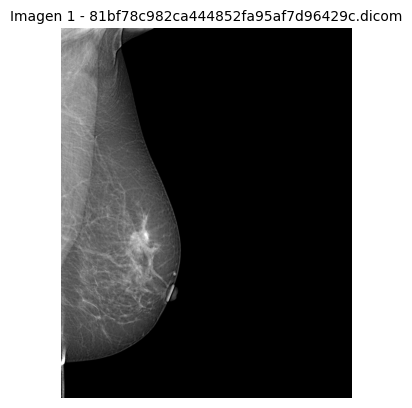

Mostrando imagen 2: 9eac03525ce74859de0f3643d611ef78.dicom


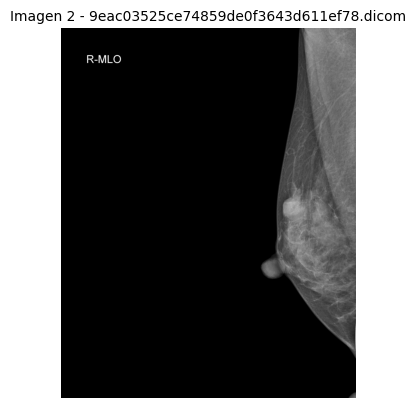

Mostrando imagen 3: 255f0dcc5ca3131051e5fc06af99fca9.dicom


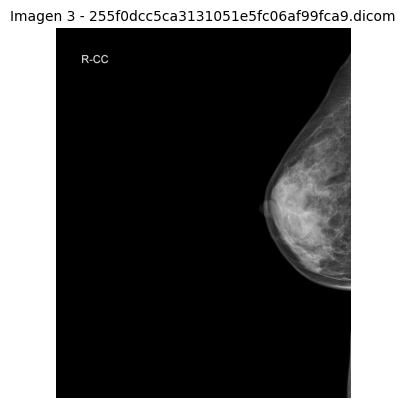

Mostrando imagen 4: 2424a42cd4c30fdb50d63a044055b1ee.dicom


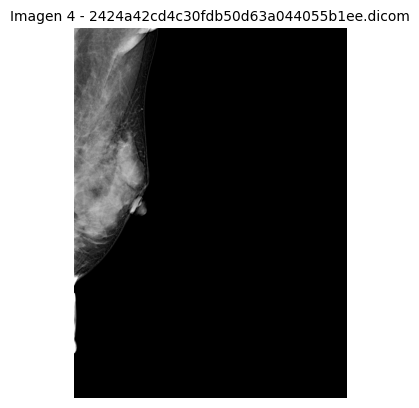

Mostrando imagen 5: 4785b56fa6a49b939087d0544a04e65f.dicom


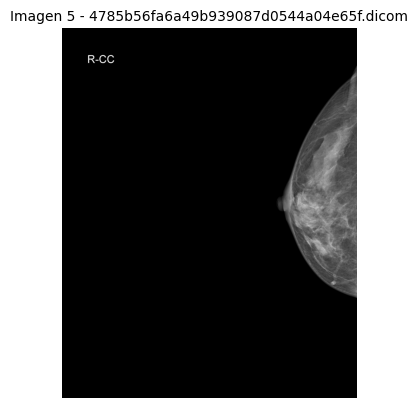

Mostrando imagen 6: ab972de519306ea9c1ce7629e8145cdf.dicom


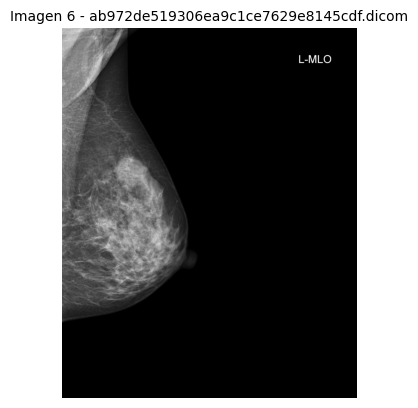

Mostrando imagen 7: 2167f4da549862d60f43782cd38fb8ae.dicom


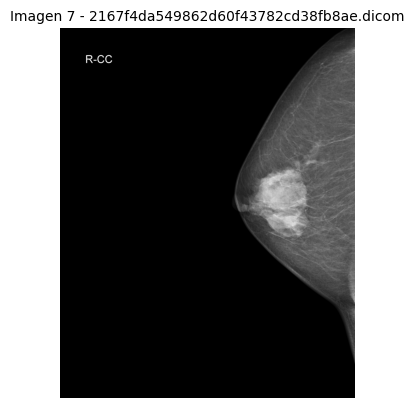

Mostrando imagen 8: 002074412a8fc178c271fb93b55c3e29.dicom


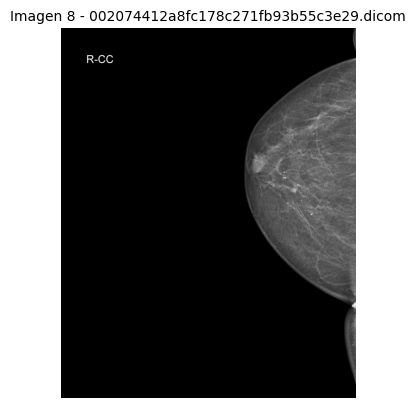

Mostrando imagen 9: 807c754bdbee40c54b7f4452b6410bb5.dicom


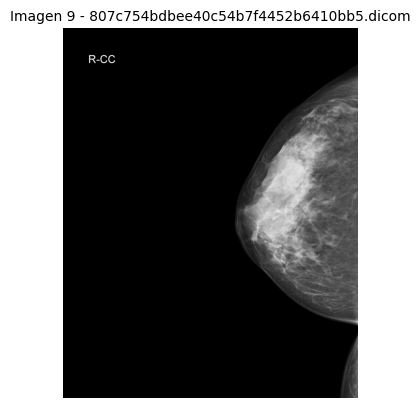

Mostrando imagen 10: a743c234e305205215516a957dc669cf.dicom


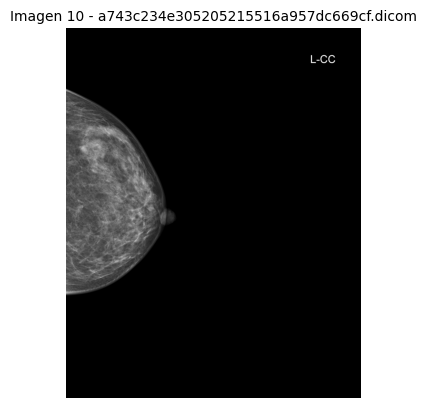

In [39]:
import os
import pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta a la carpeta con las imágenes DICOM que quieres visualizar
dicom_folder_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_con_masas_o_calcificaciones'

# Función para mostrar una imagen DICOM con VOI LUT aplicado
def show_dicom_image_with_voi_lut(dicom_path, title):
    dicom = pydicom.dcmread(dicom_path)
    
    # Aplicar VOI LUT si está disponible
    if 'WindowCenter' in dicom and 'WindowWidth' in dicom:
        img = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        img = dicom.pixel_array
    
    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Obtener las primeras 10 imágenes de la carpeta
def show_first_10_images(dicom_folder):
    dicom_files = [f for f in os.listdir(dicom_folder) if f.endswith('.dicom')]
    
    if len(dicom_files) == 0:
        print("No se encontraron archivos DICOM en la carpeta.")
        return

    # Mostrar las primeras 10 imágenes
    for i, dicom_file in enumerate(dicom_files[:10]):
        dicom_path = os.path.join(dicom_folder, dicom_file)
        print(f"Mostrando imagen {i+1}: {dicom_file}")
        show_dicom_image_with_voi_lut(dicom_path, f"Imagen {i+1} - {dicom_file}")

# Ejecutar la visualización de las primeras 10 imágenes
show_first_10_images(dicom_folder_path)


In [41]:
import os
import pydicom

# Ruta a la carpeta donde se guardaron las imágenes procesadas (imagenes_m2)
output_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_m2/2f067732b7b86ef47f0e2a5b1858cafe'

# Nombre de la imagen DICOM de la que queremos ver los metadatos
dicom_filename = 'a743c234e305205215516a957dc669cf.dicom'

# Ruta completa a la imagen DICOM
dicom_path = os.path.join(output_dir, dicom_filename)

# Leer el archivo DICOM y extraer los metadatos
if os.path.exists(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    # Mostrar los metadatos
    print(dicom_data)
else:
    print(f"No se encontró el archivo DICOM: {dicom_filename}")


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: a743c234e305205215516a957dc669cf
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RadiAnt-2020.1.1'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: a743c234e305205215516a957dc669cf
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 1090) Manufacturer's Model Name           LO: 'Mammomat Inspiration'
(0010, 0040) 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'a743c234e305205215516a957dc669cf'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2f067732b7b86ef47f0e2a5b1858cafe'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '340fa5c86460d62e4be7414615fd6df9'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Mostrando imagen 1: 81bf78c982ca444852fa95af7d96429c.dicom


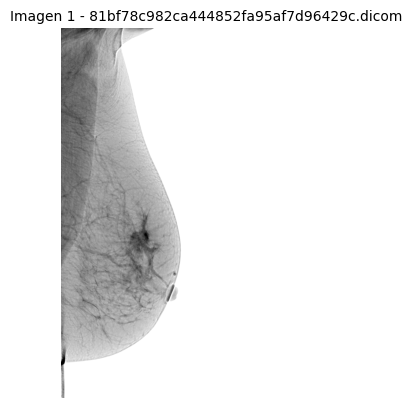

Mostrando imagen 2: 9eac03525ce74859de0f3643d611ef78.dicom


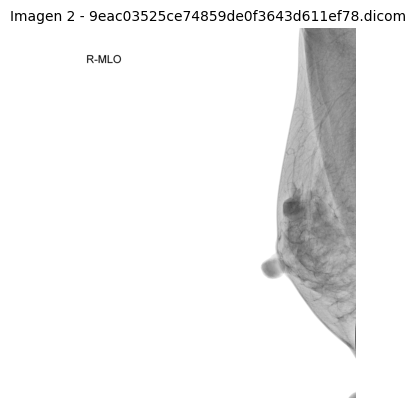

Mostrando imagen 3: 255f0dcc5ca3131051e5fc06af99fca9.dicom


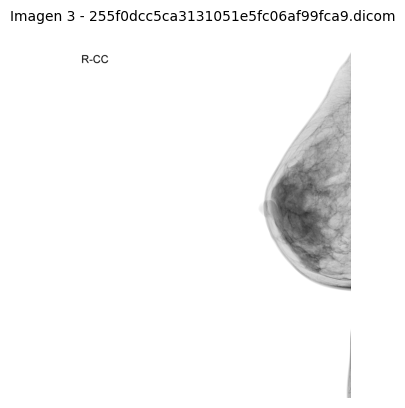

Mostrando imagen 4: 2424a42cd4c30fdb50d63a044055b1ee.dicom


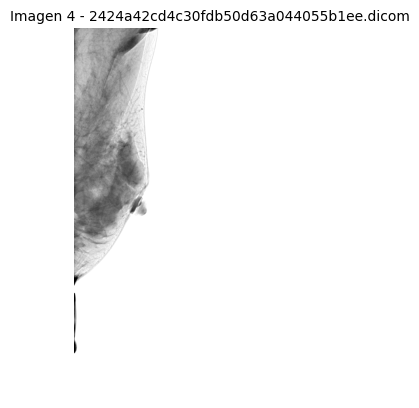

Mostrando imagen 5: 4785b56fa6a49b939087d0544a04e65f.dicom


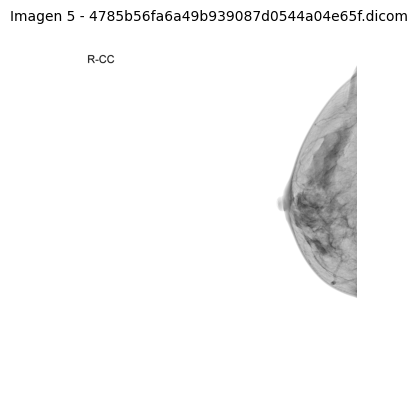

Mostrando imagen 6: ab972de519306ea9c1ce7629e8145cdf.dicom


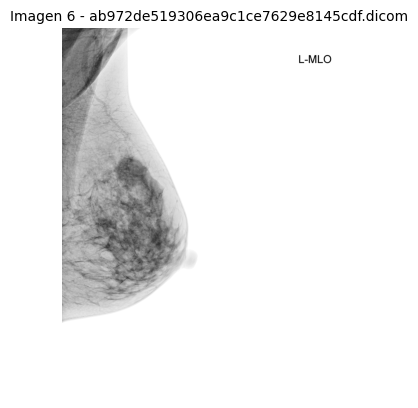

Mostrando imagen 7: 2167f4da549862d60f43782cd38fb8ae.dicom


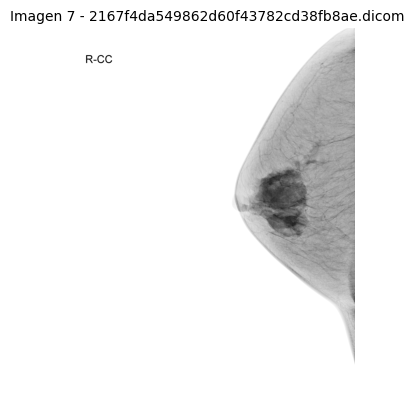

Mostrando imagen 8: 002074412a8fc178c271fb93b55c3e29.dicom


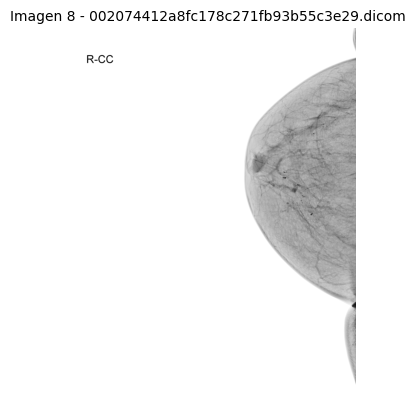

Mostrando imagen 9: 807c754bdbee40c54b7f4452b6410bb5.dicom


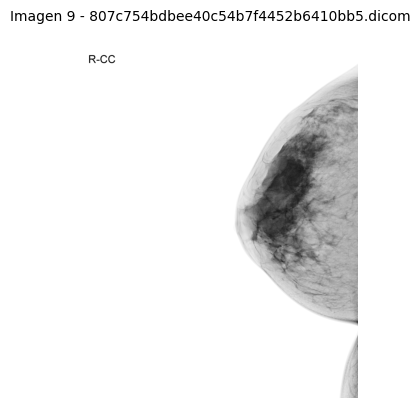

Mostrando imagen 10: a743c234e305205215516a957dc669cf.dicom


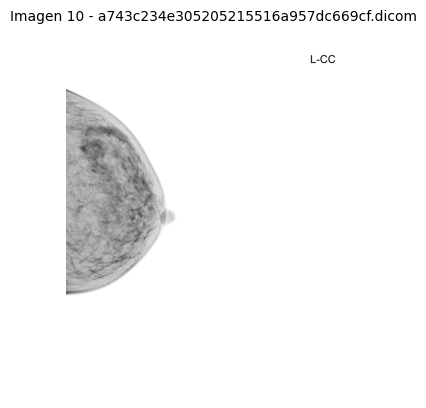

In [44]:
import os
import pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta a la carpeta con las imágenes DICOM que quieres visualizar
dicom_folder_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/imagenes_con_masas_o_calcificaciones'

# Función para mostrar una imagen DICOM con VOI LUT aplicado y ajuste para Monochrome2
def show_dicom_image_with_voi_lut(dicom_path, title):
    dicom = pydicom.dcmread(dicom_path)
    
    # Aplicar VOI LUT si está disponible
    if 'WindowCenter' in dicom and 'WindowWidth' in dicom:
        img = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        img = dicom.pixel_array
    
    # Verificar si la imagen es Monochrome2 y ajustar los valores
    if dicom.PhotometricInterpretation == "MONOCHROME2":
        img = img.max() - img  # Invertir los valores de píxeles
    
    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Obtener las primeras 10 imágenes de la carpeta
def show_first_10_images(dicom_folder):
    dicom_files = [f for f in os.listdir(dicom_folder) if f.endswith('.dicom')]
    
    if len(dicom_files) == 0:
        print("No se encontraron archivos DICOM en la carpeta.")
        return

    # Mostrar las primeras 10 imágenes
    for i, dicom_file in enumerate(dicom_files[:10]):
        dicom_path = os.path.join(dicom_folder, dicom_file)
        print(f"Mostrando imagen {i+1}: {dicom_file}")
        show_dicom_image_with_voi_lut(dicom_path, f"Imagen {i+1} - {dicom_file}")

# Ejecutar la visualización de las primeras 10 imágenes
show_first_10_images(dicom_folder_path)
